In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

## 2D

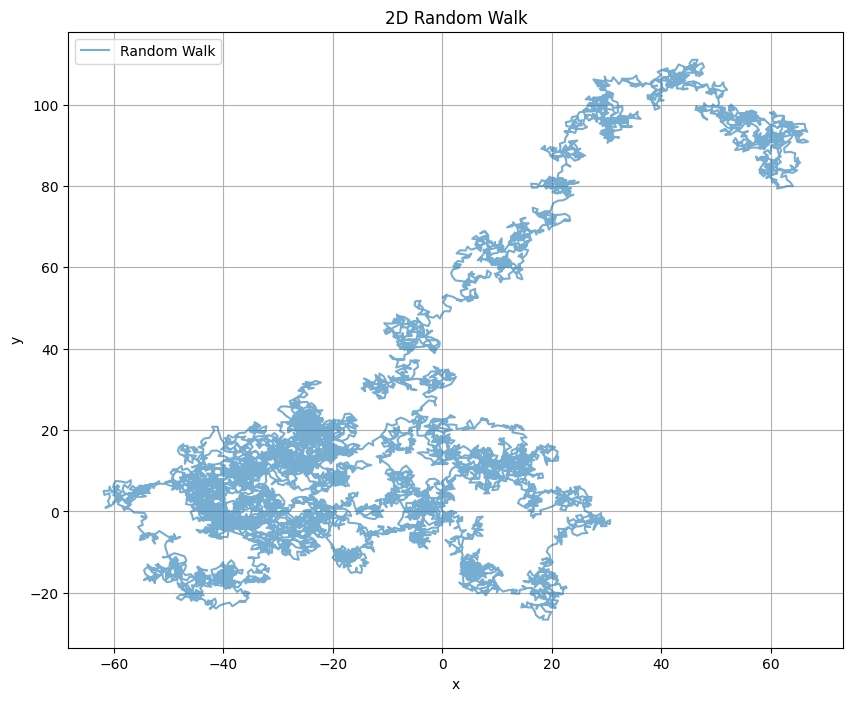

In [2]:
#simulate a random walk in 2D

# Number of steps
N = 10000

# Random walk simulation in 2D
x = np.zeros(N)
y = np.zeros(N)

# At each step, move in a random direction
for i in range(1, N):
    theta = 2 * np.pi * np.random.rand()  # Random direction
    x[i] = x[i-1] + np.cos(theta)
    y[i] = y[i-1] + np.sin(theta)

# Plot the random walk
plt.figure(figsize=(10, 8))
plt.plot(x, y, label="Random Walk", alpha=0.6)
plt.title("2D Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
def compute_msd(x, y, tau):
    """Compute the MSD for a given lag time tau."""
    return np.mean((x[tau:] - x[:-tau])**2 + (y[tau:] - y[:-tau])**2)

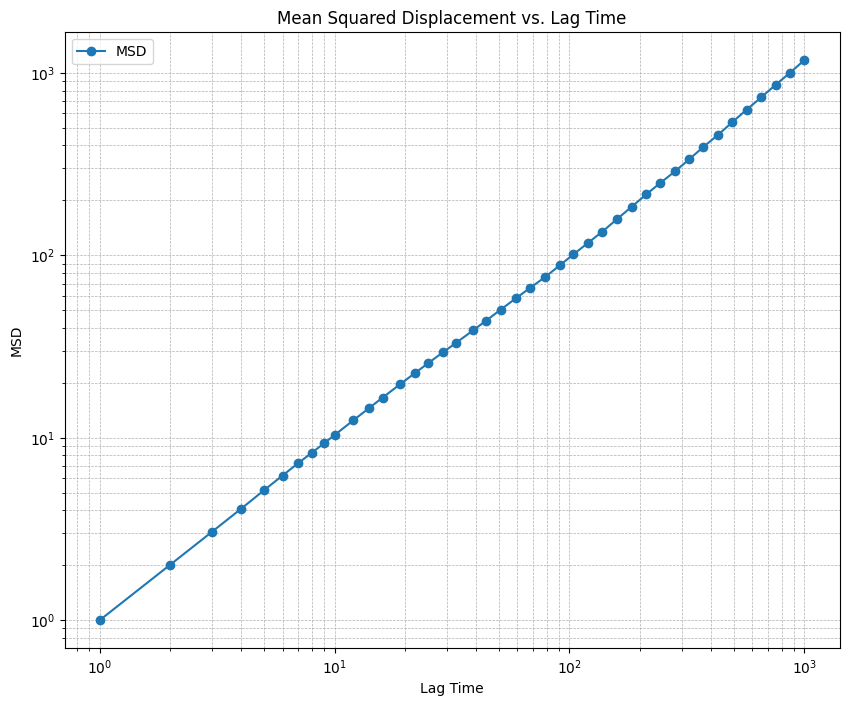

In [10]:
def compute_msd(x, y, tau):
    """Compute the MSD for a given lag time tau."""
    return np.mean((x[tau:] - x[:-tau])**2 + (y[tau:] - y[:-tau])**2)


@jit(nopython=True)
def compute_msd_numba(x, y, tau):
    """Compute the MSD for a given lag time tau using Numba."""
    N = len(x)
    total = 0.0
    count = 0
    for i in range(N - tau):
        total += (x[i + tau] - x[i])**2 + (y[i + tau] - y[i])**2
        count += 1
    return total / count

# Spaced lag times, e.g., 1, 10, 20, ... , 1000
lag_times = np.arange(1, 1001, 10)
lag_times = np.logspace(0, 3, 50).astype(int)
lag_times = np.unique(lag_times)

msd_values = [compute_msd(x, y, tau) for tau in lag_times]

# Plot MSD vs lag time
plt.figure(figsize=(10, 8))
plt.loglog(lag_times, msd_values, 'o-', label="MSD")
plt.title("Mean Squared Displacement vs. Lag Time")
plt.xlabel("Lag Time")
plt.ylabel("MSD")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


In [11]:
lag_times

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   12,
         14,   16,   19,   22,   25,   29,   33,   39,   44,   51,   59,
         68,   79,   91,  104,  120,  138,  159,  184,  212,  244,  281,
        323,  372,  429,  494,  568,  655,  754,  868, 1000])

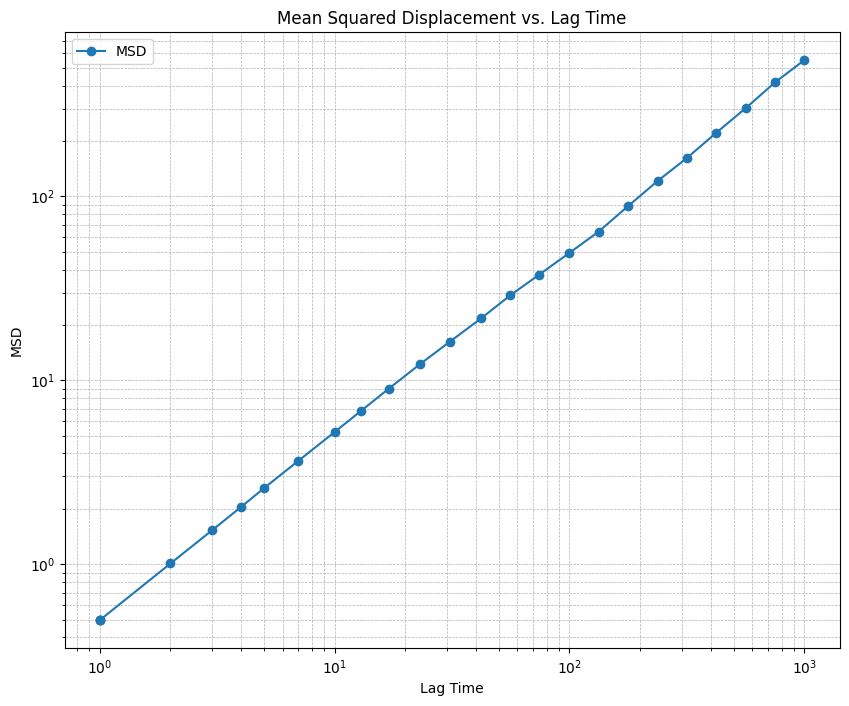

In [5]:
# if you want to keep the y-coordinate fixed, you can do the following:
# Random walk simulation in 2D
y_fixed = np.ones_like(x) # make the y-coordinate fixed


# Spaced lag times, e.g., 1, 10, 20, ... , 1000
lag_times = np.arange(1, 1001, 10)
lag_times = np.logspace(0, 3, 25).astype(int)

msd_values = [compute_msd(x, y_fixed, tau) for tau in lag_times]

# Plot MSD vs lag time
plt.figure(figsize=(10, 8))
plt.loglog(lag_times, msd_values, 'o-', label="MSD")
plt.title("Mean Squared Displacement vs. Lag Time")
plt.xlabel("Lag Time")
plt.ylabel("MSD")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

In [6]:
# Spaced lag times, e.g., 1, 10, 20, ... , 1000
lag_times = np.logspace(0, 3, 25).astype(int)
lag_times

array([   1,    1,    1,    2,    3,    4,    5,    7,   10,   13,   17,
         23,   31,   42,   56,   74,  100,  133,  177,  237,  316,  421,
        562,  749, 1000])

## 1D

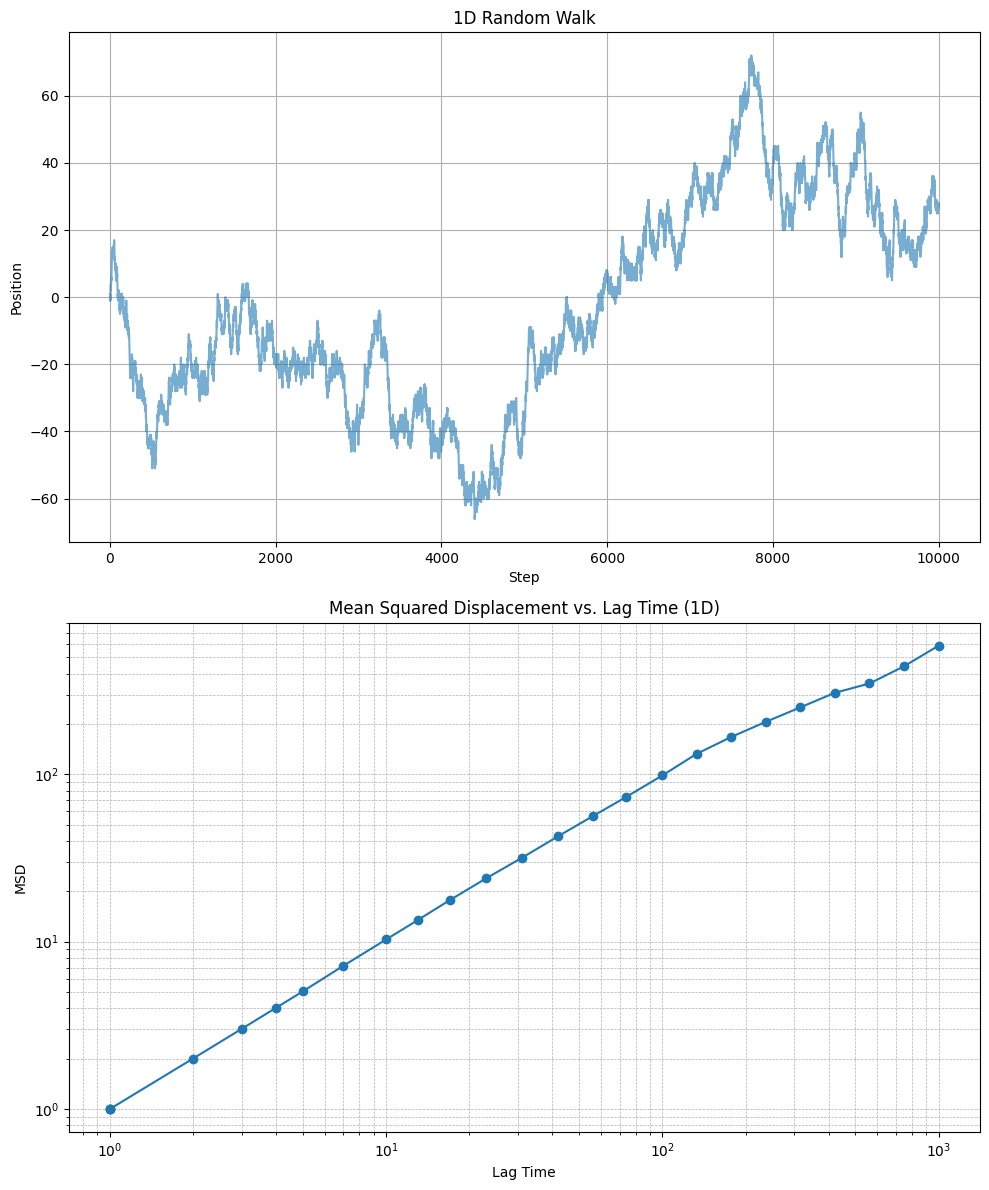

In [7]:
# 1D Random walk simulation
N = 10000
x_1d = np.zeros(N)

# At each step, move either left (-1) or right (+1)
for i in range(1, N):
    x_1d[i] = x_1d[i-1] + np.random.choice([-1, 1])

def compute_msd_1d(x, tau):
    """Compute the MSD for a 1D random walk for a given lag time tau."""
    return np.mean((x[tau:] - x[:-tau])**2)

# Compute MSD for the 1D random walk at spaced lag times
msd_values_1d = [compute_msd_1d(x_1d, tau) for tau in lag_times]

# Plot the 1D random walk and its MSD
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Random walk
ax[0].plot(x_1d, label="1D Random Walk", alpha=0.6)
ax[0].set_title("1D Random Walk")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Position")
ax[0].grid(True)

# MSD
ax[1].loglog(lag_times, msd_values_1d, 'o-', label="MSD")
ax[1].set_title("Mean Squared Displacement vs. Lag Time (1D)")
ax[1].set_xlabel("Lag Time")
ax[1].set_ylabel("MSD")
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


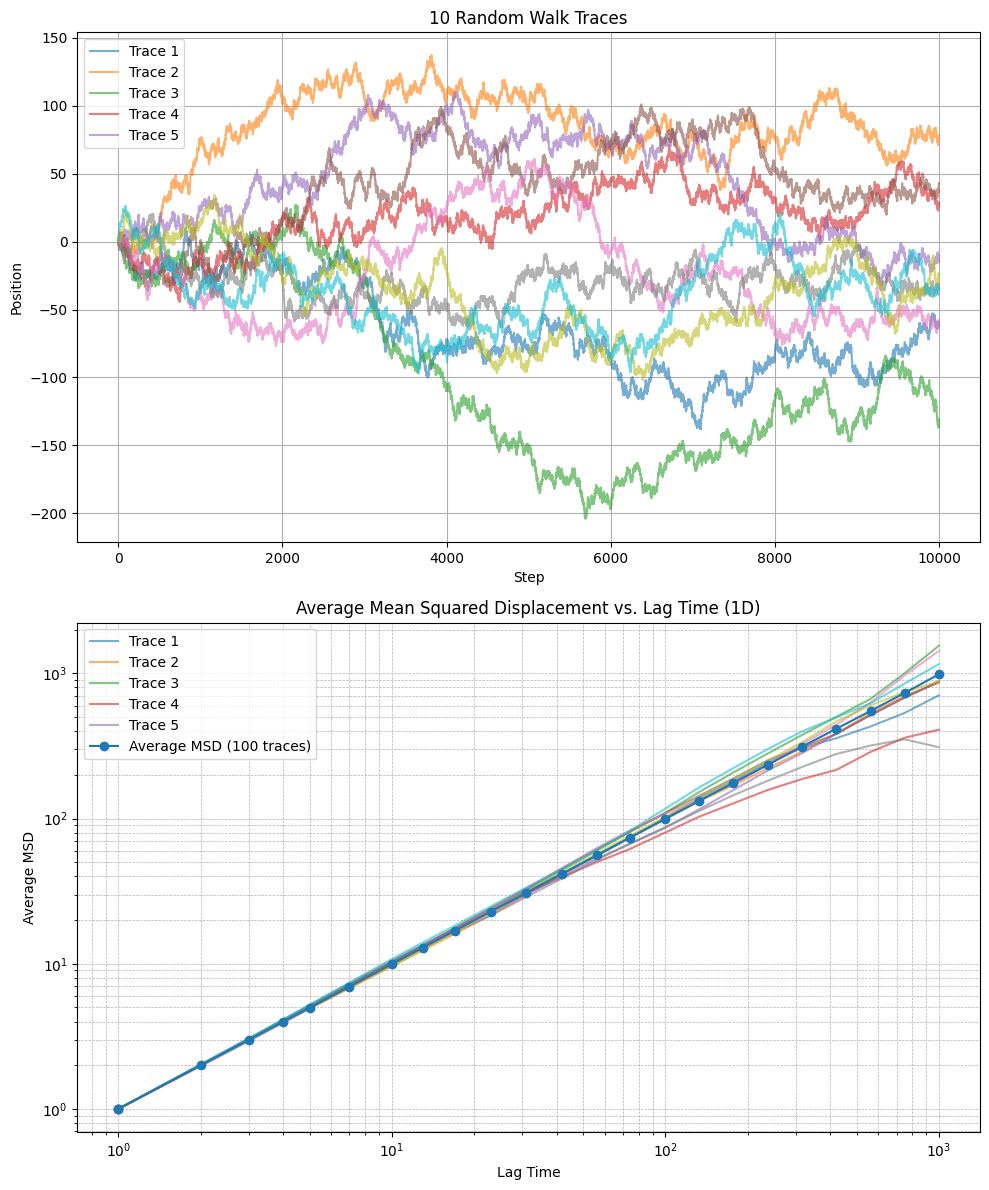

In [8]:
# Number of traces and steps per trace
M = 100  # Number of traces
N = 10000  # Steps per trace

# Function to simulate a single 1D random walk
def simulate_1d_walk(N):
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = x[i-1] + np.random.choice([-1, 1])
    return x

# Simulate M traces
traces = [simulate_1d_walk(N) for _ in range(M)]

# Compute MSD for each trace
msd_traces = np.array([np.array([compute_msd_1d(trace, tau) for tau in lag_times]) for trace in traces])

# Average the MSD values across all traces
avg_msd = msd_traces.mean(axis=0)

# Number of traces to plot
num_traces_to_plot = 10

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot a subset of the traces
for i in range(num_traces_to_plot):
    ax[0].plot(traces[i], alpha=0.6, label=f'Trace {i+1}' if i < 5 else "")  # Label only the first 5 for clarity

ax[0].set_title(f"{num_traces_to_plot} Random Walk Traces")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Position")
ax[0].legend()
ax[0].grid(True)

# Plot the average MSD
for i in range(num_traces_to_plot):
    ax[1].loglog(lag_times, msd_traces[i], alpha=0.6, label=f'Trace {i+1}' if i < 5 else "")  # Label only the first 5 for clarity

ax[1].loglog(lag_times, avg_msd, 'o-', label="Average MSD (100 traces)")
ax[1].set_title("Average Mean Squared Displacement vs. Lag Time (1D)")
ax[1].set_xlabel("Lag Time")
ax[1].set_ylabel("Average MSD")
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()


In [9]:
msd_traces.shape

(100, 25)